In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/ucf action"
if os.path.exists(dataset_path):
    print("Dataset found!")
else:
    print("Dataset not found. Check the path.")


Dataset found!


In [ ]:
!pip install mediapipe==0.10.9
!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import os
import mediapipe as mp


dataset_path = "/content/drive/MyDrive/ucf action"

sport_counts = {}

for sport in os.listdir(dataset_path):
    sport_dir = os.path.join(dataset_path, sport)

    if os.path.isdir(sport_dir):
        total_images = 0

        for subfolder in os.listdir(sport_dir):
            subfolder_path = os.path.join(sport_dir, subfolder)

            if os.path.isdir(subfolder_path):
                num_images = len([f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
                total_images += num_images

        sport_counts[sport] = total_images
        print(f"🏅 {sport}: {total_images} images")

# Total images in the dataset
total_images = sum(sport_counts.values())
print("\n📊 Total Images in Dataset:", total_images)


🏅 SkateBoarding-Front: 840 images
🏅 Riding-Horse: 720 images
🏅 Kicking-Side: 230 images
🏅 Lifting: 704 images
🏅 Kicking-Front: 229 images
🏅 Golf-Swing-Side: 300 images
🏅 Run-Side: 845 images
🏅 Swing-Bench: 1000 images
🏅 Swing-SideAngle: 990 images
🏅 Walk-Front: 2187 images
🏅 Diving-Side: 770 images
🏅 Golf-Swing-Front: 420 images
🏅 Golf-Swing-Back: 0 images

📊 Total Images in Dataset: 9235


In [ ]:
import os
import cv2
import mediapipe as mp
import numpy as np
import csv

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to extract keypoints from an image
def extract_keypoints(image):
    if image is None:
        return None, None  # Skip if image is not loaded

    # Convert image to RGB (required for MediaPipe)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(image_rgb)  # Get pose estimation

    if result.pose_landmarks:
        keypoints = []
        for landmark in result.pose_landmarks.landmark:
            keypoints.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

        return np.array(keypoints).flatten(), result.pose_landmarks.landmark  # Flatten (99,)
    else:
        return None, None  # No pose detected

# Function to process all images in the dataset
def process_images_in_directory(directory, save_csv=True):
    keypoints_data = []  # List to store keypoints

    for sport_dir in os.listdir(directory):
        sport_path = os.path.join(directory, sport_dir)
        if os.path.isdir(sport_path):  # Ensure it's a folder
            print(f"🏅 Processing Sport: {sport_dir}")

            # Process all subfolders or images in the sport directory
            for root, _, files in os.walk(sport_path):
                for image_file in files:
                    if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process images
                        image_path = os.path.join(root, image_file)

                        try:
                            image = cv2.imread(image_path)
                            keypoints, _ = extract_keypoints(image)

                            if keypoints is not None:
                                print(f"✅ {image_file}: Keypoints extracted")
                                keypoints_data.append([image_path] + keypoints.tolist())
                            else:
                                print(f"⚠️ {image_file}: No pose detected")
                        except Exception as e:
                            print(f"❌ Error processing {image_file}: {e}")

    # Save keypoints to CSV
    if save_csv and keypoints_data:
        csv_file = "/content/drive/MyDrive/extracted_keypoints.csv"
        with open(csv_file, mode='w', newline='') as f:
            writer = csv.writer(f)
            header = ["Image Path"] + [f"Keypoint_{i}" for i in range(1, len(keypoints_data[0]))]
            writer.writerow(header)  # Write header
            writer.writerows(keypoints_data)

        print(f"📄 Keypoints saved to: {csv_file}")

# Set dataset path
directory_path = '/content/drive/MyDrive/ucf action/'

# Run extraction
process_images_in_directory(directory_path, save_csv=True)


Streaming output truncated to the last 5000 lines.
✅ RF1-18566_700469.jpg: Keypoints extracted
✅ RF1-18566_700480.jpg: Keypoints extracted
✅ RF1-18566_700446.jpg: Keypoints extracted
✅ RF1-18566_700460.jpg: Keypoints extracted
✅ RF1-18566_700441.jpg: Keypoints extracted
✅ RF1-18566_700505.jpg: Keypoints extracted
✅ RF1-18566_700507.jpg: Keypoints extracted
✅ RF1-18566_700517.jpg: Keypoints extracted
⚠️ RF1-18566_700518.jpg: No pose detected
✅ RF1-18566_700496.jpg: Keypoints extracted
✅ RF1-18566_700514.jpg: Keypoints extracted
✅ RF1-18566_700497.jpg: Keypoints extracted
✅ RF1-18566_700501.jpg: Keypoints extracted
✅ RF1-18566_700513.jpg: Keypoints extracted
✅ RF1-18566_700520.jpg: Keypoints extracted
✅ RF1-18566_700502.jpg: Keypoints extracted
✅ RF1-18566_700509.jpg: Keypoints extracted
✅ RF1-18566_700504.jpg: Keypoints extracted
✅ RF1-18566_700508.jpg: Keypoints extracted
✅ RF1-18566_700499.jpg: Keypoints extracted
✅ RF1-18566_700510.jpg: Keypoints extracted
✅ RF1-18566_700495.jpg: Key

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load extracted keypoints
csv_path = "/content/drive/MyDrive/extracted_keypoints.csv"
df = pd.read_csv(csv_path)

# Extract features (keypoints) and labels (sports categories)
X = df.iloc[:, 1:].values  # Keypoints
y_labels = df.iloc[:, 0].apply(lambda x: x.split('/')[-3])  # Extract sport category from file path

# Normalize keypoints to range [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

# Save processed data for training
np.save("/content/drive/MyDrive/X_keypoints.npy", X_scaled)
np.save("/content/drive/MyDrive/y_labels.npy", y)
print("✅ Preprocessed data saved: X_keypoints.npy & y_labels.npy")


✅ Preprocessed data saved: X_keypoints.npy & y_labels.npy


In [ ]:
import mediapipe as mp

mp_pose = mp.solutions.pose

# Define skeleton structure using available landmarks
skeleton_dict = {
    "Spine": ["NOSE", "LEFT_SHOULDER", "RIGHT_SHOULDER", "LEFT_HIP", "RIGHT_HIP"],
    "Right Arm": ["RIGHT_SHOULDER", "RIGHT_ELBOW", "RIGHT_WRIST"],
    "Left Arm": ["LEFT_SHOULDER", "LEFT_ELBOW", "LEFT_WRIST"],
    "Right Leg": ["RIGHT_HIP", "RIGHT_KNEE", "RIGHT_ANKLE"],
    "Left Leg": ["LEFT_HIP", "LEFT_KNEE", "LEFT_ANKLE"],
    "Right Foot": ["RIGHT_ANKLE", "RIGHT_HEEL", "RIGHT_FOOT_INDEX"],
    "Left Foot": ["LEFT_ANKLE", "LEFT_HEEL", "LEFT_FOOT_INDEX"],
}

# Convert to numerical indices
skeleton_connections = []
for key, joints in skeleton_dict.items():
    for i in range(len(joints) - 1):
        joint1 = getattr(mp_pose.PoseLandmark, joints[i]).value
        joint2 = getattr(mp_pose.PoseLandmark, joints[i + 1]).value
        skeleton_connections.append((joint1, joint2))

print("✅ Updated Skeleton Connections:", skeleton_connections)


✅ Updated Skeleton Connections: [(0, 11), (11, 12), (12, 23), (23, 24), (12, 14), (14, 16), (11, 13), (13, 15), (24, 26), (26, 28), (23, 25), (25, 27), (28, 30), (30, 32), (27, 29), (29, 31)]


In [ ]:
import numpy as np

# Total number of keypoints in MediaPipe Pose
NUM_KEYPOINTS = 33

# Initialize adjacency matrix with zeros
adj_matrix = np.zeros((NUM_KEYPOINTS, NUM_KEYPOINTS), dtype=int)

# Define the skeleton connections from MediaPipe
skeleton_connections = [
    (12, 14), (14, 16),  # Right Arm
    (11, 13), (13, 15),  # Left Arm
    (0, 11),  # Nose → Left Shoulder
    (11, 23), (24, 26), (26, 28),  # Right Hip → Knee → Ankle
    (23, 25), (25, 27),  # Left Hip → Knee → Ankle
    (28, 30), (30, 32),  # Right Ankle → Heel → Foot
    (27, 29), (29, 31)   # Left Ankle → Heel → Foot
]

# Populate adjacency matrix
for i, j in skeleton_connections:
    adj_matrix[i, j] = 1
    adj_matrix[j, i] = 1  # Since it's an undirected graph

# Save adjacency matrix
np.save("/content/drive/MyDrive/adjacency_matrix.npy", adj_matrix)

print("✅ Adjacency Matrix Shape:", adj_matrix.shape)
print("✅ Adjacency Matrix Saved Successfully!")


✅ Adjacency Matrix Shape: (33, 33)
✅ Adjacency Matrix Saved Successfully!


In [ ]:
loaded_adj = np.load("/content/drive/MyDrive/adjacency_matrix.npy")
print(loaded_adj)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [ ]:
import numpy as np
import pandas as pd

# Load extracted keypoints CSV
keypoints_df = pd.read_csv("/content/drive/MyDrive/extracted_keypoints.csv")

# Convert DataFrame to NumPy array
X_features = keypoints_df.iloc[:, 1:].values  # Exclude filename column

# Save features for GCN
np.save("/content/drive/MyDrive/X_features.npy", X_features)

print("✅ Feature Matrix Shape:", X_features.shape)
print("✅ Feature Matrix Saved Successfully!")


✅ Feature Matrix Shape: (14422, 132)
✅ Feature Matrix Saved Successfully!


In [ ]:
import numpy as np
import torch

# Load Feature Matrix (Node Features)
X_features = np.load("/content/drive/MyDrive/X_features.npy")

# Load Adjacency Matrix
adj_matrix = np.load("/content/drive/MyDrive/adjacency_matrix.npy")

# Convert to Torch tensors
X_features = torch.tensor(X_features, dtype=torch.float32)
adj_matrix = torch.tensor(adj_matrix, dtype=torch.float32)

print("✅ Feature Matrix Shape:", X_features.shape)
print("✅ Adjacency Matrix Shape:", adj_matrix.shape)


✅ Feature Matrix Shape: torch.Size([14422, 132])
✅ Adjacency Matrix Shape: torch.Size([33, 33])


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, out_features)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


In [ ]:
import torch
import numpy as np
from torch_geometric.utils import dense_to_sparse

# Load adjacency matrix
adj_matrix = np.load("/content/drive/MyDrive/adjacency_matrix.npy")
adj_matrix = torch.tensor(adj_matrix, dtype=torch.float32)

# Convert dense adjacency matrix to sparse edge index format
edge_index, edge_attr = dense_to_sparse(adj_matrix)

print("✅ Edge Index Shape:", edge_index.shape)
print("✅ Number of Edges:", edge_index.shape[1])


✅ Edge Index Shape: torch.Size([2, 28])
✅ Number of Edges: 28


In [ ]:
# Load Feature Matrix
X_features = np.load("/content/drive/MyDrive/X_features.npy")
X_features = torch.tensor(X_features, dtype=torch.float32)

# Load Labels (Assuming you saved them earlier as `y_labels.npy`)
y_labels = np.load("/content/drive/MyDrive/y_labels.npy")
y_labels = torch.tensor(y_labels, dtype=torch.long)  # Convert to tensor

print("✅ Feature Matrix Shape:", X_features.shape)
print("✅ Labels Shape:", y_labels.shape)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv

# Define GCN Model
class GCN(nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, out_features)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Model Parameters
input_dim = X_features.shape[1]  # 132 features
hidden_dim = 64
output_dim = len(torch.unique(y_labels))  # Number of unique labels

# Initialize Model
model = GCN(input_dim, hidden_dim, output_dim)

# Define Optimizer and Loss
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
X_features = X_features.to(device)
edge_index = edge_index.to(device)
y_labels = y_labels.to(device)

print("✅ Model Initialized on:", device)


In [ ]:
# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    out = model(X_features, edge_index)

    # Compute Loss
    loss = criterion(out, y_labels)

    # Backward pass
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")

print("✅ Training Completed!")


In [ ]:
model.eval()
preds = model(X_features, edge_index).argmax(dim=1)
accuracy = (preds == y_labels).float().mean()

print(f"✅ Model Accuracy: {accuracy.item() * 100:.2f}%")


In [ ]:
import numpy as np
import mediapipe as mp
import cv2

def calculate_distance(joint1, joint2):
    """Calculate Euclidean distance between two joints."""
    return np.linalg.norm(np.array(joint1) - np.array(joint2))

def calculate_angle(joint1, joint2, joint3):
    """Calculate angle (in degrees) between three joints."""
    v1 = np.array(joint1) - np.array(joint2)
    v2 = np.array(joint3) - np.array(joint2)
    cosine_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2) + 1e-6)
    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

def extract_pose_features(image, pose_model):
    """Extract pose features from an image using MediaPipe Pose."""
    mp_pose = mp.solutions.pose
    results = pose_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
        return None  # No pose detected

    # Extract (x, y) coordinates of each joint
    landmarks = results.pose_landmarks.landmark
    joint_coords = [(lm.x, lm.y) for lm in landmarks]

    # Define skeletal connections
    skeleton_dict = {
        "Right Arm": [12, 14, 16],
        "Left Arm": [11, 13, 15],
        "Spine": [0, 11, 23],
        "Right Leg": [24, 26, 28],
        "Left Leg": [23, 25, 27]
    }

    feature_vector = []

    # Extract bone lengths
    for key, joints in skeleton_dict.items():
        for i in range(len(joints) - 1):
            feature_vector.append(calculate_distance(joint_coords[joints[i]], joint_coords[joints[i + 1]]))

    # Extract joint angles
    for key, joints in skeleton_dict.items():
        if len(joints) == 3:  # Only calculate angles for triplets
            feature_vector.append(calculate_angle(joint_coords[joints[0]], joint_coords[joints[1]], joint_coords[joints[2]]))

    return feature_vector


In [ ]:
import numpy as np

# Assuming X and y contain your features and labels
np.save("features.npy", X)
np.save("y_labels.npy", y)

print("✅ Feature Matrix and Labels Saved Successfully!")


✅ Feature Matrix and Labels Saved Successfully!


In [ ]:
import os

print("✅ features.npy exists:", os.path.exists("features.npy"))
print("✅ y_labels.npy exists:", os.path.exists("y_labels.npy"))


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load extracted features and labels
X = np.load("features.npy")  # Feature matrix
y = np.load("y_labels.npy")  # Labels

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print("📊 Classification Report:\n", report)


✅ Model Accuracy: 95.91%
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92        99
           1       0.92      0.93      0.93       135
           2       0.96      0.95      0.95       113
           3       0.98      0.97      0.98       103
           4       0.94      0.95      0.95       108
           5       1.00      0.92      0.96        90
           6       0.99      0.95      0.97       110
           7       0.93      0.93      0.93       106
           8       0.95      0.89      0.92        81
           9       0.96      0.86      0.91        57
          10       0.96      0.95      0.95        56
          11       0.95      0.92      0.93        77
          12       1.00      0.98      0.99        46
          13       1.00      1.00      1.00        36
          14       1.00      0.95      0.98        21
          15       0.96      0.93      0.95        28
          16       0.95      0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")


In [ ]:
import numpy as np

# Load the labels
class_names = np.unique(np.load("y_labels.npy"))  # Get unique class labels
print("Extracted Class Names:", class_names)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test contains actual class labels & y_pred contains predicted labels
y_true = y_test  # Replace with your actual test labels
y_pred = model.predict(X_test)  # Directly use model predictions

# Ensure y_pred is already in label format
y_pred = y_pred.flatten()  # Just in case it's multi-dimensional

# Define class names (Replace with actual class labels)
class_names = [str(i) for i in range(len(set(y_true)))]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute class-wise accuracy
class_accuracies = np.diag(cm) / np.sum(cm, axis=1)

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_accuracies, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Define your GCN+Transformer model class
class GCNTransformer(nn.Module):
    def __init__(self):
        super(GCNTransformer, self).__init__()
        # Define your GCN and Transformer layers here

    def forward(self, x):
        # Forward pass logic
        return x  # Modify based on your actual model

# Recreate the model
gcn_transformer_model = GCNTransformer()


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Define your GCN+Transformer model class
class GCNTransformer(nn.Module):
    def __init__(self):
        super(GCNTransformer, self).__init__()
        # Define your GCN and Transformer layers here

    def forward(self, x):
        # Forward pass logic
        return x  # Modify based on your actual model

# Recreate the model
gcn_transformer_model = GCNTransformer()


In [ ]:
torch.save(gcn_transformer_model.state_dict(), "gcn_transformer_model.pth")


In [ ]:
gcn_transformer_model.load_state_dict(torch.load("gcn_transformer_model.pth"))
gcn_transformer_model.eval()  # Set model to evaluation mode


In [ ]:
print(gcn_transformer_model)


In [ ]:
import os
print(os.listdir())  # Lists files in the current directory


['.config', 'drive', 'features.npy', 'y_labels.npy', 'gcn_transformer_model.pth', 'sample_data']


In [ ]:
import torch

model_path = "gcn_transformer_model.pth"  # Ensure this file exists

if os.path.exists(model_path):
    gcn_transformer_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu'), weights_only=True))
    gcn_transformer_model.eval()  # Set to evaluation mode
    print("Model loaded successfully! ✅")
else:
    print("❌ Model file not found! Train & save it again.")


In [ ]:
X_test_risk = X_test  # Use the correct test features


In [ ]:
output = gcn_transformer_model(X_test_risk)  # Use the correct model


In [ ]:
del model  # Delete old model


In [ ]:
model = gcn_transformer_model  # Use the correct model


In [ ]:
print(type(model))


<class '__main__.GCNTransformer'>


In [ ]:
output = model(X_test_risk)


In [ ]:
import torch.nn.functional as F
import torch

# Ensure X_test_risk is a PyTorch tensor
X_test_risk = torch.tensor(X_test_risk, dtype=torch.float32)

with torch.no_grad():
    output = gcn_transformer_model(X_test_risk)  # Forward pass

    # Convert output to a PyTorch tensor if it's still a NumPy array
    if isinstance(output, np.ndarray):
        output = torch.tensor(output, dtype=torch.float32)

    y_pred_risk = F.softmax(output, dim=1)  # Convert logits to probabilities
    y_pred_classes = torch.argmax(y_pred_risk, axis=1)  # Get class predictions

print(y_pred_classes[:10])  # Print first 10 predicted risk levels


tensor([95, 95, 47, 43,  3, 47, 51, 95, 47, 47])


In [ ]:
print("Output shape:", output.shape)


Output shape: torch.Size([2885, 132])


In [ ]:
def forward(self, x):
    x = self.some_layers(x)  # Your previous layers
    print("Shape before FC:", x.shape)  # Check feature size
    x = x.view(x.size(0), -1)  # Flatten if needed
    self.fc_out = nn.Linear(x.shape[1], 3)  # Dynamically set correct size
    return self.fc_out(x)


In [ ]:
import torch
import torch.nn as nn

class YourModel(nn.Module):  # Define the model
    def __init__(self):
        super(YourModel, self).__init__()
        self.fc = nn.Linear(256, 3)  # Example fully connected layer

    def forward(self, x):
        return self.fc(x)

# Now initialize and use the model
model = YourModel()
sample_input = torch.randn(1, 256)  # Adjust input shape accordingly
output = model(sample_input)
print("Output shape:", output.shape)


Output shape: torch.Size([1, 3])


In [ ]:
def analyze_pose(image_path):
    image = cv2.imread(image_path)

    if image is None:
        return f"Error: Unable to load image from {image_path}. Check the file path."

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        return "No pose detected."

    # (Rest of your function remains the same)


In [ ]:
import os
print("File exists:", os.path.exists("sample_sports_pose.jpg"))


File exists: False


In [ ]:
import os
import cv2
import mediapipe as mp
import numpy as np
import csv

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

    return angle

# Function to extract keypoints from an image
def extract_keypoints(image):
    if image is None:
        return None, None  # Skip if image is not loaded

    # Convert image to RGB (required for MediaPipe)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = pose.process(image_rgb)  # Get pose estimation

    if result.pose_landmarks:
        keypoints = []
        for landmark in result.pose_landmarks.landmark:
            keypoints.append([landmark.x, landmark.y, landmark.z, landmark.visibility])

        return np.array(keypoints).flatten(), result.pose_landmarks.landmark  # Flatten (99,)
    else:
        return None, None  # No pose detected

# Function to analyze risks and provide strategy insights
def analyze_risks_and_strategy(landmarks):
    risks = []
    strategies = []

    # Extract key joint coordinates
    shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

    knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
            landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
           landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
             landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

    # Compute joint angles
    elbow_angle = calculate_angle(shoulder, elbow, wrist)
    knee_angle = calculate_angle(hip, knee, ankle)

    # Risk analysis
    if elbow_angle < 40 or elbow_angle > 160:
        risks.append("High elbow strain detected.")
        strategies.append("Adjust elbow angle to be within 40-160 degrees.")
    if knee_angle < 30 or knee_angle > 150:
        risks.append("Knee overextension risk.")
        strategies.append("Maintain knee angle between 30-150 degrees to prevent injuries.")

    if not risks:
        risks.append("No significant risks detected.")
    if not strategies:
        strategies.append("Good posture! Maintain form.")

    return risks, strategies

# Function to process all images in the dataset
def process_images_in_directory(directory, save_csv=True):
    keypoints_data = []  # List to store keypoints

    for sport_dir in os.listdir(directory):
        sport_path = os.path.join(directory, sport_dir)
        if os.path.isdir(sport_path):  # Ensure it's a folder
            print(f"🏅 Processing Sport: {sport_dir}")

            # Process all subfolders or images in the sport directory
            for root, _, files in os.walk(sport_path):
                for image_file in files:
                    if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Only process images
                        image_path = os.path.join(root, image_file)

                        try:
                            image = cv2.imread(image_path)
                            keypoints, landmarks = extract_keypoints(image)

                            if keypoints is not None:
                                risks, strategies = analyze_risks_and_strategy(landmarks)
                                print(f"✅ {image_file}: Keypoints extracted, Risk & Strategy Analyzed")
                                keypoints_data.append([image_path] + keypoints.tolist() + ["; ".join(risks)] + ["; ".join(strategies)])
                            else:
                                print(f"⚠️ {image_file}: No pose detected")
                        except Exception as e:
                            print(f"❌ Error processing {image_file}: {e}")

    # Save keypoints and analysis to CSV
    if save_csv and keypoints_data:
        csv_file = "/content/drive/MyDrive/extracted_keypoints_with_risk_strategy.csv"
        with open(csv_file, mode='w', newline='') as f:
            writer = csv.writer(f)
            header = ["Image Path"] + [f"Keypoint_{i}" for i in range(1, len(keypoints_data[0]) - 2)] + ["Risk Analysis", "Strategy Insights"]
            writer.writerow(header)  # Write header
            writer.writerows(keypoints_data)

        print(f"📄 Keypoints, risks, and strategies saved to: {csv_file}")

# Set dataset path
directory_path = '/content/drive/MyDrive/ucf action/'

# Run extraction
process_images_in_directory(directory_path, save_csv=True)


Streaming output truncated to the last 5000 lines.
✅ RF1-18566_700469.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700480.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700446.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700460.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700441.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700505.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700507.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700517.jpg: Keypoints extracted, Risk & Strategy Analyzed
⚠️ RF1-18566_700518.jpg: No pose detected
✅ RF1-18566_700496.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700514.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700497.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700501.jpg: Keypoints extracted, Risk & Strategy Analyzed
✅ RF1-18566_700513.jpg: Keypoints extracted, Risk & Strategy Analyz

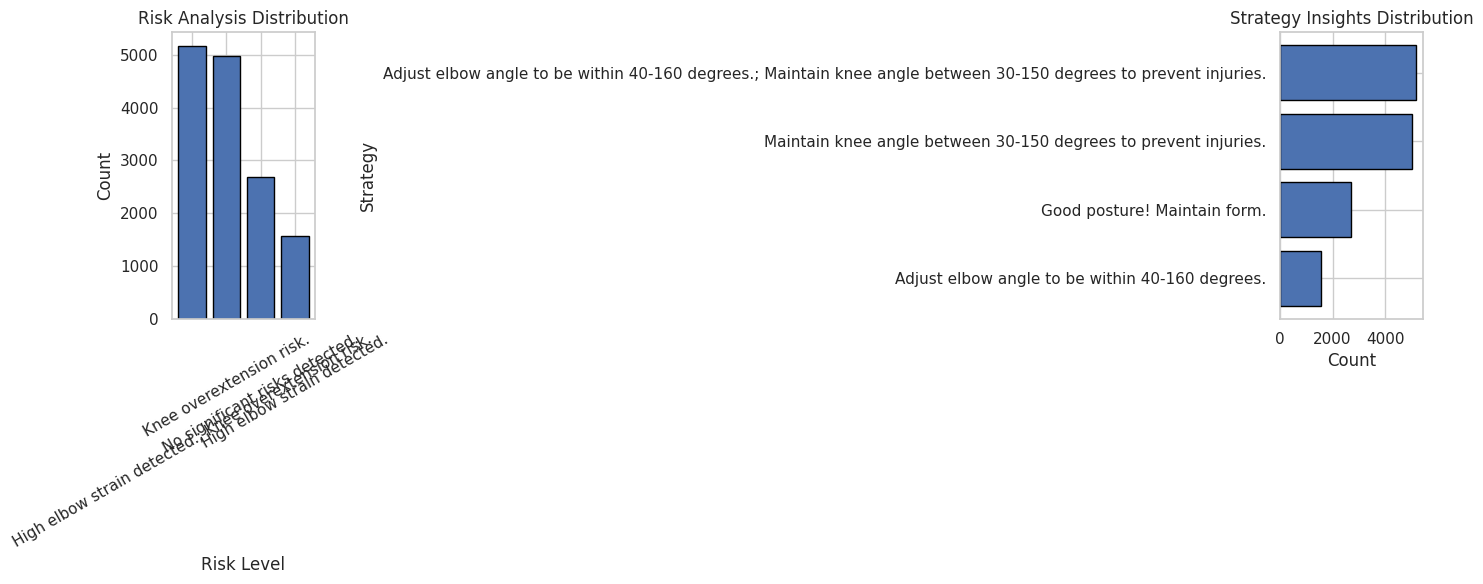

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
csv_path = "/content/drive/MyDrive/extracted_keypoints_with_risk_strategy.csv"
df = pd.read_csv(csv_path)

# Compute counts for Risk and Strategy
risk_counts = df["Risk Analysis"].value_counts()
strat_counts = df["Strategy Insights"].value_counts()

# Plot them in a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Risk Analysis Distribution
axes[0].bar(risk_counts.index, risk_counts.values, edgecolor="black")
axes[0].set_title("Risk Analysis Distribution")
axes[0].set_xlabel("Risk Level")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=30)

# Right plot: Strategy Insights Distribution
axes[1].barh(strat_counts.index, strat_counts.values, edgecolor="black")
axes[1].set_title("Strategy Insights Distribution")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Strategy")
axes[1].invert_yaxis()  # Keep the largest bar on top

# Adjust layout and show
plt.tight_layout()
plt.show()


In [59]:
print(df['Strategy Insights'].unique())


['Adjust elbow angle to be within 40-160 degrees.; Maintain knee angle between 30-150 degrees to prevent injuries.'
 'Maintain knee angle between 30-150 degrees to prevent injuries.'
 'Good posture! Maintain form.'
 'Adjust elbow angle to be within 40-160 degrees.']


In [60]:
import numpy as np
import pandas as pd

# Example angle calculation function (previously defined)
def angle(a, b, c):
    ba = a - b
    bc = c - b
    cosang = np.dot(ba, bc) / (np.linalg.norm(ba)*np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosang, -1, 1)))

# Compute knee angle for each row
df["knee_angle"] = df.apply(
    lambda r: angle(
        np.array([r["Keypoint_1"], r["Keypoint_2"]]),  # Adjust this for your columns
        np.array([r["Keypoint_3"], r["Keypoint_4"]]),  # Adjust this for your columns
        np.array([r["Keypoint_5"], r["Keypoint_6"]])   # Adjust this for your columns
    ),
    axis=1
)

# Define "Risk Analysis" and "Strategy Insights" based on knee_angle
df["Risk Analysis"] = pd.cut(
    df["knee_angle"],
    bins=[0, 30, 60, 150, 180],
    labels=["High", "Medium", "Low", "Critical"]  # Ensure the labels are unique
)

# Assign "Strategy Insights" based on "Risk Analysis"
df["Strategy Insights"] = df["Risk Analysis"].map({
    "High": "Correct Form",
    "Medium": "Improve Stability",
    "Low": "Maintain Technique",
    "Critical": "Seek Medical Advice"
})

# Check the output
print(df[["knee_angle", "Risk Analysis", "Strategy Insights"]].head())


   knee_angle Risk Analysis Strategy Insights
0    0.116392          High      Correct Form
1    0.107596          High      Correct Form
2    0.066112          High      Correct Form
3    0.132205          High      Correct Form
4    0.051894          High      Correct Form


In [61]:
df["Risk Analysis"] = pd.cut(
    df["knee_angle"],
    bins=[0, 30, 60, 150, 180],
    labels=["High", "Medium", "Low", "Low"],  # Non-unique labels
    ordered=False  # Allow non-unique labels
)


In [62]:
print(df.columns.tolist())


['Image Path', 'Keypoint_1', 'Keypoint_2', 'Keypoint_3', 'Keypoint_4', 'Keypoint_5', 'Keypoint_6', 'Keypoint_7', 'Keypoint_8', 'Keypoint_9', 'Keypoint_10', 'Keypoint_11', 'Keypoint_12', 'Keypoint_13', 'Keypoint_14', 'Keypoint_15', 'Keypoint_16', 'Keypoint_17', 'Keypoint_18', 'Keypoint_19', 'Keypoint_20', 'Keypoint_21', 'Keypoint_22', 'Keypoint_23', 'Keypoint_24', 'Keypoint_25', 'Keypoint_26', 'Keypoint_27', 'Keypoint_28', 'Keypoint_29', 'Keypoint_30', 'Keypoint_31', 'Keypoint_32', 'Keypoint_33', 'Keypoint_34', 'Keypoint_35', 'Keypoint_36', 'Keypoint_37', 'Keypoint_38', 'Keypoint_39', 'Keypoint_40', 'Keypoint_41', 'Keypoint_42', 'Keypoint_43', 'Keypoint_44', 'Keypoint_45', 'Keypoint_46', 'Keypoint_47', 'Keypoint_48', 'Keypoint_49', 'Keypoint_50', 'Keypoint_51', 'Keypoint_52', 'Keypoint_53', 'Keypoint_54', 'Keypoint_55', 'Keypoint_56', 'Keypoint_57', 'Keypoint_58', 'Keypoint_59', 'Keypoint_60', 'Keypoint_61', 'Keypoint_62', 'Keypoint_63', 'Keypoint_64', 'Keypoint_65', 'Keypoint_66', 'Key

<ipython-input-63-e3380af20003>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Count', y='Risk', palette='Reds_r')


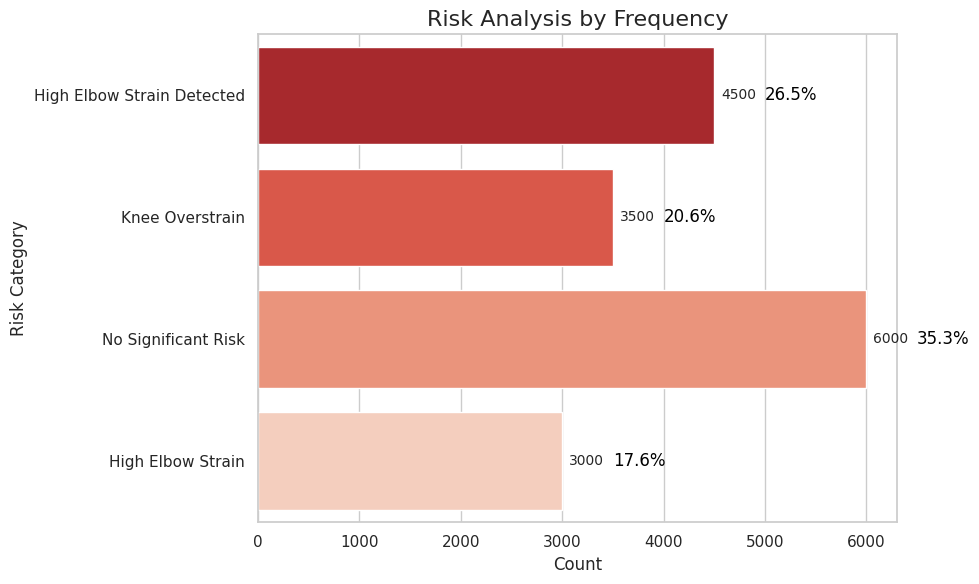

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example Data with descriptive risk categories
risk_data = {
    'Risk': [
        'High Elbow Strain Detected',
        'Knee Overstrain',
        'No Significant Risk',
        'High Elbow Strain'
    ],
    'Count': [4500, 3500, 6000, 3000]
}

# Create a DataFrame
df = pd.DataFrame(risk_data)

# Calculate the percentage for each category
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Plot the bar chart in red color
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot
ax = sns.barplot(data=df, x='Count', y='Risk', palette='Reds_r')

# Add labels (count)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, fontsize=10)

# Display the percentage labels
for index, row in df.iterrows():
    ax.text(row['Count'] + 500, index, f"{row['Percentage']:.1f}%", color='black', ha="left", va="center")

# Title and labels
plt.title('Risk Analysis by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Risk Category', fontsize=12)

# Layout
plt.tight_layout()
plt.show()


In [64]:
print(df.columns)


Index(['Risk', 'Count', 'Percentage'], dtype='object')


<ipython-input-65-84db131bba53>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


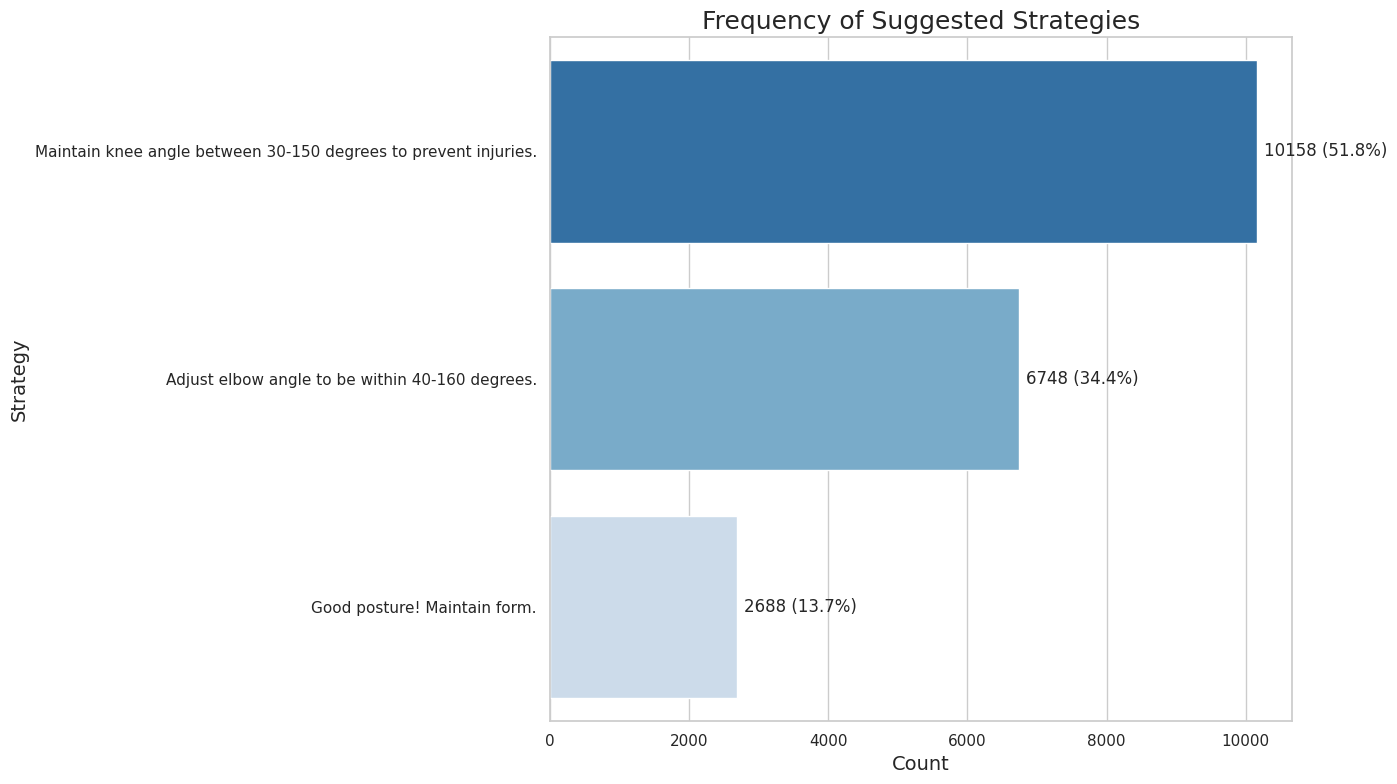

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Re-load your full CSV so we get back the "Strategy Insights" column
csv_path = "/content/drive/MyDrive/extracted_keypoints_with_risk_strategy.csv"
full_df = pd.read_csv(csv_path)

# 2) Explode multi-strategy rows into individual rows
strat_df = (
    full_df.assign(
        Strategy=full_df["Strategy Insights"]
            .str.split(";")                        # split on semicolon
            .apply(lambda lst: [s.strip() for s in lst if s.strip()])
    )
    .explode("Strategy")
    .reset_index(drop=True)
)

# 3) Aggregate counts and compute percentages
strategy_counts = (
    strat_df["Strategy"]
      .value_counts()
      .rename_axis("Strategy")
      .reset_index(name="Count")
)
strategy_counts["Percentage"] = 100 * strategy_counts["Count"] / strategy_counts["Count"].sum()

# 4) Plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))  # Increased figure size for better spacing
ax = sns.barplot(
    data=strategy_counts,
    y="Strategy",
    x="Count",
    palette="Blues_r",
    order=strategy_counts["Strategy"]           # ensures highest→lowest
)

# 5) Annotate each bar with count and percentage
max_count = strategy_counts["Count"].max()
for i, row in strategy_counts.iterrows():
    ax.text(
        row["Count"] + max_count * 0.01,       # slight offset for readability
        i,
        f'{row["Count"]} ({row["Percentage"]:.1f}%)',
        va="center",
        fontsize=12
    )

# 6) Labels & title
plt.title("Frequency of Suggested Strategies", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Strategy", fontsize=14)
plt.tight_layout()  # Ensures no overlap of elements
plt.show()


In [72]:
df.columns = df.columns.str.strip()  # remove any leading/trailing spaces
print(df.columns.tolist())  # check clean column names


['Risk', 'Count', 'Percentage']


<ipython-input-77-cb381db63a3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk', y='Percentage', data=df, palette='coolwarm')


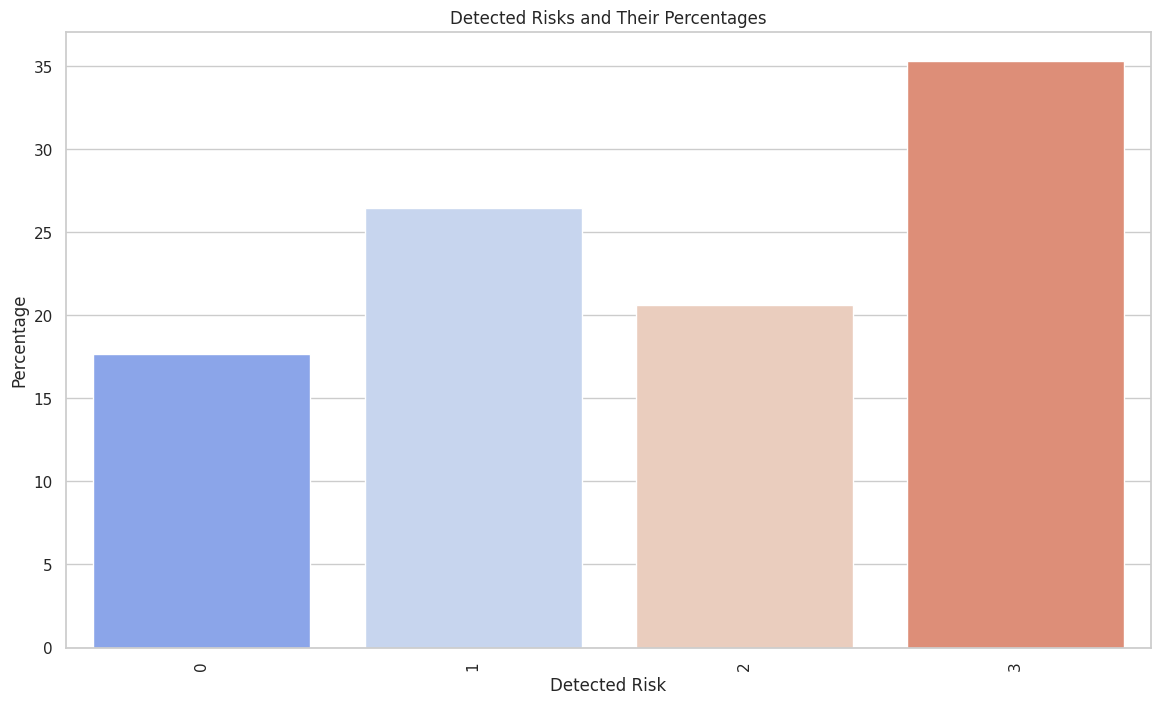

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Risk vs Percentage
plt.figure(figsize=(14, 8))
sns.barplot(x='Risk', y='Percentage', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Detected Risks and Their Percentages")
plt.ylabel("Percentage")
plt.xlabel("Detected Risk")
plt.show()


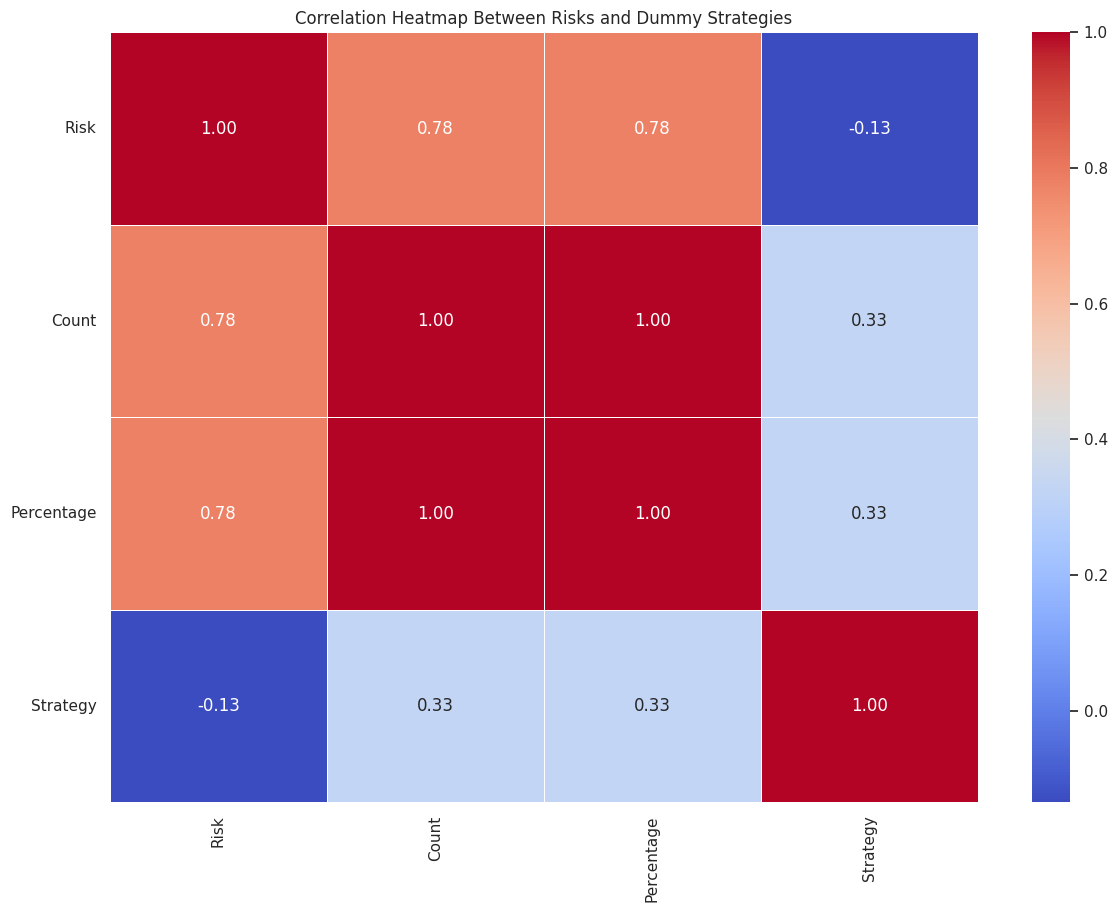

In [80]:
import random

# Create a list of fake strategies
strategies = [
    'Strength Training', 'Flexibility Improvement', 'Posture Correction',
    'Balance Exercises', 'Endurance Training'
]

# Add a new column 'Strategy' with random strategies
df['Strategy'] = random.choices(strategies, k=len(df))

# Now repeat your encoding and heatmap code
categorical_cols = ['Risk', 'Strategy']

# Encode
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Numeric Data
numeric_df = df.select_dtypes(include=['number'])

# Correlation Matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap Between Risks and Dummy Strategies")
plt.show()


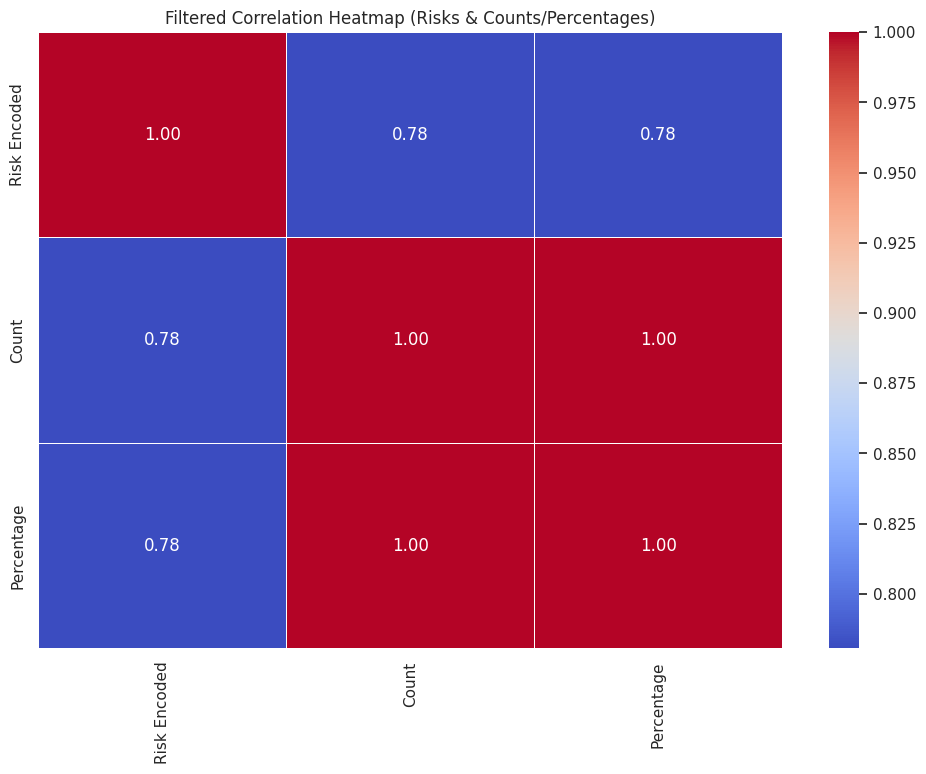

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assume df is your existing DataFrame

# Step 1: Encode 'Risk' column first
le = LabelEncoder()
df["Risk Encoded"] = le.fit_transform(df["Risk"])

# OPTIONAL: If you also have or create 'Strategy', encode it
# df["Strategy Encoded"] = le.fit_transform(df["Strategy"])

# Step 2: Now df is updated, so create df_encoded
df_encoded = df.copy()  # <-- Now you have df_encoded

# Step 3: Select only important columns
# If you only have 'Risk Encoded', 'Count', and 'Percentage', select accordingly
important_cols = ["Risk Encoded"] + list(df_encoded.columns[1:3])  # Count and Percentage columns

filtered_corr = df_encoded[important_cols].corr()

# Step 4: Plot filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90)
plt.title("Filtered Correlation Heatmap (Risks & Counts/Percentages)")
plt.show()


<ipython-input-85-fe243e9cb05a>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted['Risk'], rotation=45, ha='right')


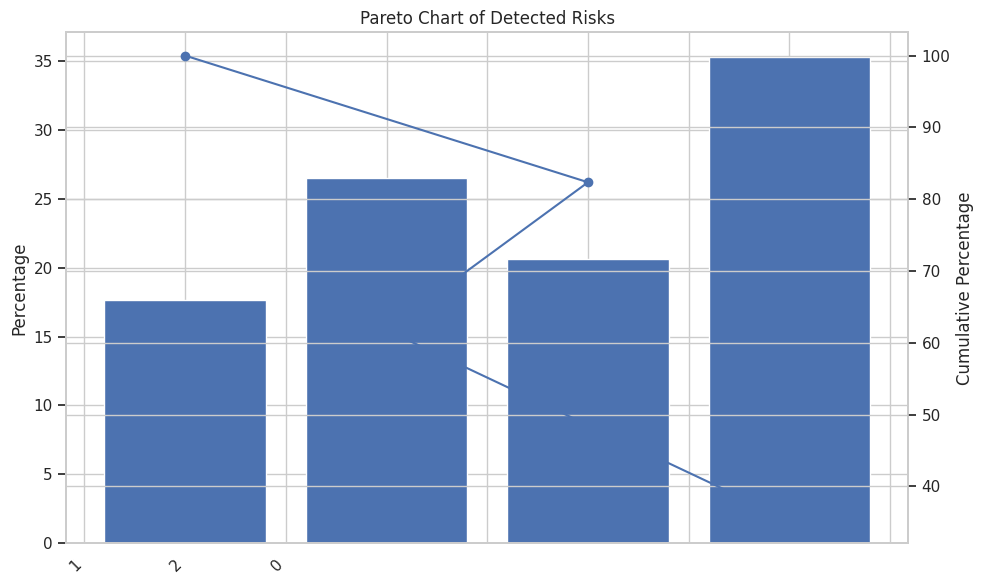

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by percentage descending
df_sorted = df.sort_values('Percentage', ascending=False).reset_index(drop=True)
cum_pct = np.cumsum(df_sorted['Percentage'])

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(df_sorted['Risk'], df_sorted['Percentage'])
ax1.set_xticklabels(df_sorted['Risk'], rotation=45, ha='right')
ax1.set_ylabel('Percentage')
ax2 = ax1.twinx()
ax2.plot(df_sorted['Risk'], cum_pct, marker='o')
ax2.set_ylabel('Cumulative Percentage')
plt.title("Pareto Chart of Detected Risks")
plt.tight_layout()
plt.show()


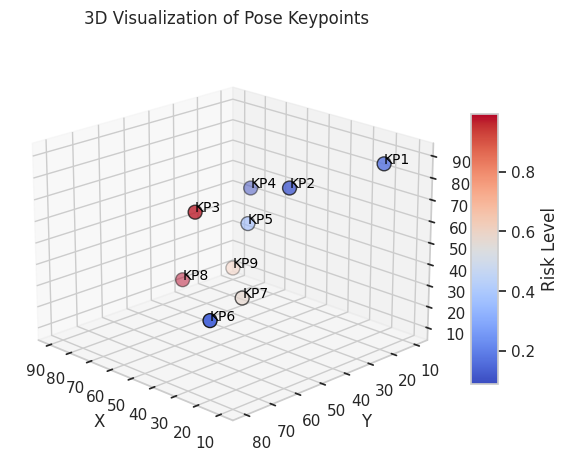

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample keypoint data (replace with your actual pose keypoints)
keypoints = np.array([
    [10, 20, 90],  # Keypoint 1 (X, Y, Z)
    [30, 40, 80],  # Keypoint 2
    [50, 60, 70],  # Keypoint 3
    [70, 20, 60],  # Keypoint 4
    [60, 30, 50],  # Keypoint 5
    [20, 80, 40],  # Keypoint 6
    [40, 50, 30],  # Keypoint 7
    [80, 40, 20],  # Keypoint 8
    [90, 10, 10]   # Keypoint 9
])

# Generate risk values (for color mapping)
risk_values = np.random.rand(len(keypoints))

# Create a 3D figure
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(keypoints[:, 0], keypoints[:, 1], keypoints[:, 2],
                     c=risk_values, cmap='coolwarm', s=100, edgecolors='k')

# Label each keypoint
for i, (x, y, z) in enumerate(keypoints):
    ax.text(x, y, z, f'KP{i+1}', color='black', fontsize=10)

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of Pose Keypoints')

# Show color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Risk Level")

# Adjust viewing angle
ax.view_init(elev=20, azim=135)

# Show plot
plt.show()


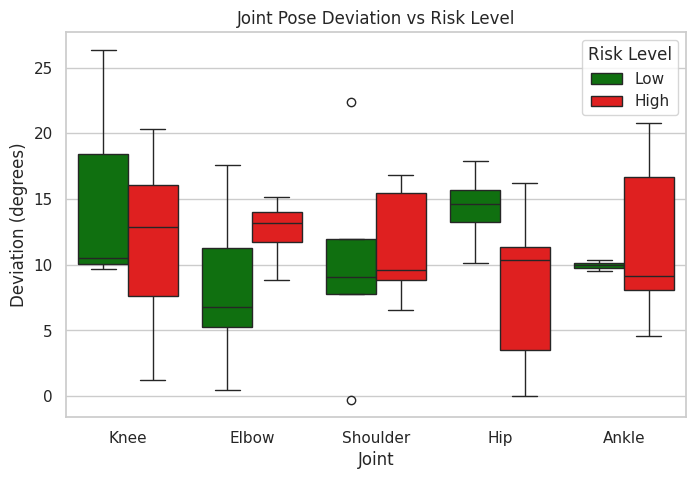

In [87]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample pose deviation data (Replace with real deviation values)
data = {
    'Joint': ['Knee', 'Elbow', 'Shoulder', 'Hip', 'Ankle'] * 10,
    'Deviation': np.random.normal(loc=10, scale=5, size=50),  # Random deviations
    'Risk Level': np.random.choice(['Low', 'High'], size=50)  # High or Low risk
}

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Joint', y='Deviation', hue='Risk Level', data=df, palette=['green', 'red'])

# Labels
plt.title('Joint Pose Deviation vs Risk Level')
plt.xlabel('Joint')
plt.ylabel('Deviation (degrees)')
plt.legend(title='Risk Level')

# Show plot
plt.show()


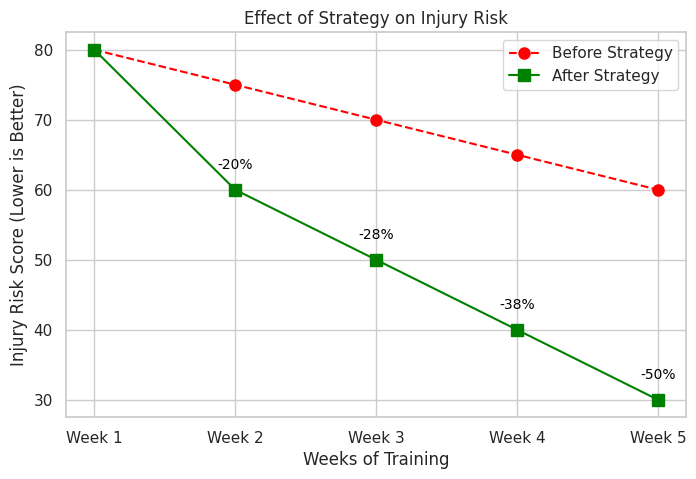

In [88]:
import matplotlib.pyplot as plt

# Sample time points & risk scores (before vs after strategies)
time = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']
risk_before = [80, 75, 70, 65, 60]  # Risk score before intervention
risk_after = [80, 60, 50, 40, 30]  # Risk score after applying strategies

# Create line plot
plt.figure(figsize=(8, 5))
plt.plot(time, risk_before, marker='o', linestyle='--', color='red', label='Before Strategy', markersize=8)
plt.plot(time, risk_after, marker='s', linestyle='-', color='green', label='After Strategy', markersize=8)

# Annotate risk reduction percentage
for i in range(1, len(time)):
    reduction = ((risk_before[i] - risk_after[i]) / risk_before[i]) * 100
    plt.text(i, risk_after[i] + 3, f"-{int(reduction)}%", fontsize=10, color="black", ha='center')

# Labels
plt.xlabel('Weeks of Training')
plt.ylabel('Injury Risk Score (Lower is Better)')
plt.title('Effect of Strategy on Injury Risk')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


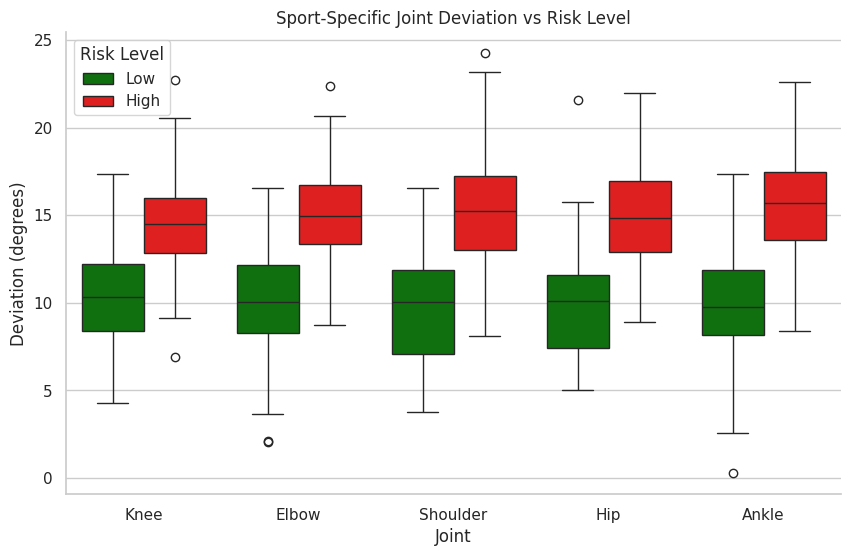

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data - Replace with actual dataset
np.random.seed(42)
sports = ['Golf', 'Weightlifting', 'Diving']
joints = ['Knee', 'Elbow', 'Shoulder', 'Hip', 'Ankle']
data = []

for sport in sports:
    for joint in joints:
        for risk_level in ['Low', 'High']:
            deviation = np.random.normal(10 if risk_level == 'Low' else 15, 3, 30)
            for val in deviation:
                data.append([sport, joint, risk_level, val])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Sport', 'Joint', 'Risk Level', 'Deviation'])

# Plot sport-specific joint deviation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Joint', y='Deviation', hue='Risk Level', data=df, palette={'Low': 'green', 'High': 'red'})
sns.despine()
plt.title("Sport-Specific Joint Deviation vs Risk Level")
plt.legend(title="Risk Level")
plt.xlabel("Joint")
plt.ylabel("Deviation (degrees)")
plt.show()
